# Memprediksi Jumlah Penduduk kota Surabaya dengan menggunakan Linear Regression

di notebook ini, kita akan memprediksi jumlah penduduk Kota Surabaya pada tahun 2024 hingga tahun 2027 dengan menggunakan Simple Linear Regression.

Kita akan menggunakan data yang berasal dari https://jatim.bps.go.id/indicator/12/375/1/jumlah-penduduk-provinsi-jawa-timur.html

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

### Data

In [62]:
#membaca data dari excel menggunakan pandas
df = pd.read_excel('kotasurabaya.xlsx')

In [84]:
df.describe()

,Tahun,Jumlah
count,23.00000,23.000000
mean,2012.00000,2.785913
std,6.78233,0.093433
min,2001.00000,2.616000
25%,2006.50000,2.709500
50%,2012.00000,2.805000
75%,2017.50000,2.874000
max,2023.00000,2.896000


In [85]:
df.head(10)

,Tahun,Jumlah
0,2001,2.616
1,2002,2.633
2,2003,2.651
3,2004,2.667
4,2005,2.684
5,2006,2.701
6,2007,2.718
7,2008,2.736
8,2009,2.753
9,2010,2.771


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tahun   23 non-null     int64  
 1   Jumlah  23 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


mari kita membuat scatter untuk melihat data penduduk Kota Surabaya

Text(0, 0.5, 'Jumlah')

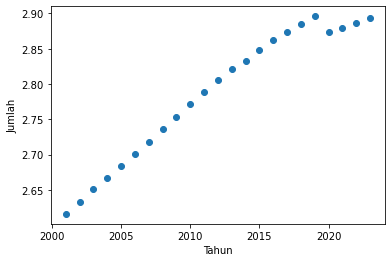

In [88]:
plt.scatter(df['Tahun'],df['Jumlah'])
plt.xlabel("Tahun")
plt.ylabel("Jumlah")

Tampaknya pada tahun 2019 terdapat penurunan yang cukup tajam dibandingkan pertumbuhan penduduk pada tahun 2001 hingga 2018 mengalami kenaikan jumlah penduduk yang cukup stabil.

### Independent Dependent Variable

In [63]:
x = df.iloc[:,[0]].values
y = df.iloc[:,[1]].values

### Split Test Train

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=0)

### Training Regressi - Prediksi

In [89]:
#mengimpor modul Linear Regression
from sklearn.linear_model import LinearRegression

In [66]:
regresi = LinearRegression()

In [67]:
regresi.fit(x_train,y_train)

LinearRegression()

In [ ]:
### Testing Prediksi 

In [68]:
y_predict= regresi.predict(x_test)

In [69]:
y_predict

array([[2.78756238],
       [2.77360234],
       [2.92716274],
       [2.82944249],
       [2.9132027 ],
       [2.64796201]])

### Evaluasi Model

In [70]:
from sklearn.metrics import mean_absolute_error, r2_score

In [71]:
print("MAE: ",mean_absolute_error(y_test,y_predict))
print("R2: ",r2_score(y_test,y_predict))

MAE:  0.023120042298396298
R2:  0.913847904311859


## Prediksi Data Baru

In [72]:
df_new = pd.read_excel('datatestprediksi.xlsx')

In [90]:
df_new

,tahun
0,2024
1,2025
2,2026
3,2027


seperti yang terlihat diatas, df_new berisi data tahun yang akan di prediksi.

In [73]:
new_predict= regresi.predict(df_new)
new_predict

C:\Users\farha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[2.95508281],
       [2.96904285],
       [2.98300288],
       [2.99696292]])

### Visualiasi data hasil prediksi


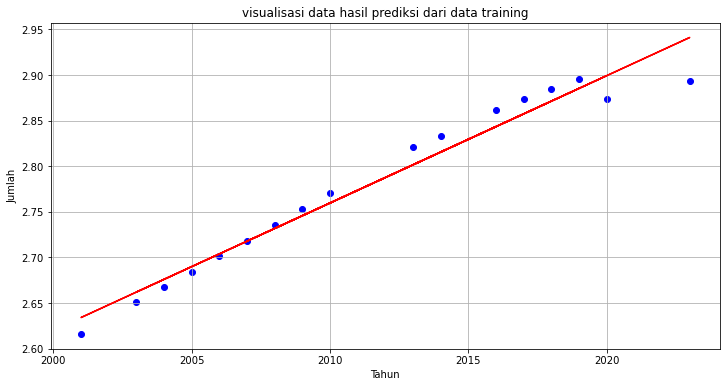

In [93]:
plt.figure(figsize=(12,6))
plt.title('visualisasi data hasil prediksi dari data training')
#data training (obervasi) warna biru
plt.scatter(x_train,y_train,c='blue')
#garis data hasil prediksi dari data prediksi
plt.plot(x_train,regresi.predict(x_train),c='red')

plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.grid()

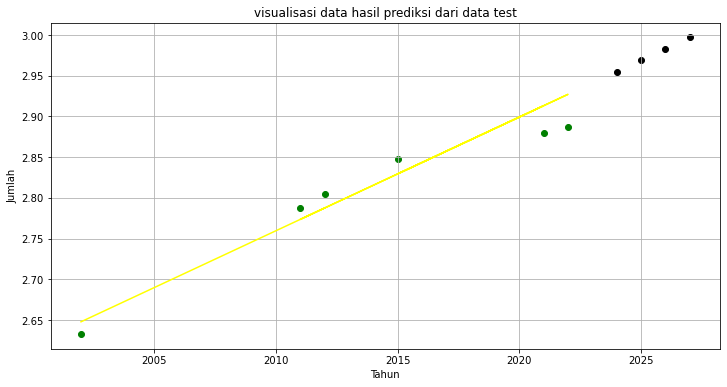

In [94]:
plt.figure(figsize=(12,6))
plt.title('visualisasi data hasil prediksi dari data test')
#data training (obervasi) warna biru
plt.scatter(x_test,y_test,c='green')
#garis data hasil prediksi dari data test
plt.plot(x_test,y_predict,c='yellow')

plt.scatter(df_new,new_predict, c='black')
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.grid()

titik hitam diatas adalah hasil prediksi jumlah penduduk Kota Surabaya berdasarkan data test